In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from itertools import islice



In [0]:
df_train=pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
df_train.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [0]:
df_train.drop(['patient_id', 'name_of_drug', 'use_case_for_drug', 
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],axis=1)

,review_by_patient
0,"""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""Suboxone has completely turned my life around..."
4,"""2nd day on 5mg started to work with rock hard..."
...,...
32160,"""I have been taking Cymbalta for 15 months now..."
32161,"""I have had the Nexplanon since Dec. 27, 2016 ..."
32162,"""Had panic attacks and social anxiety starting..."
32163,"""I have been off Prozac for about 4 weeks now...."


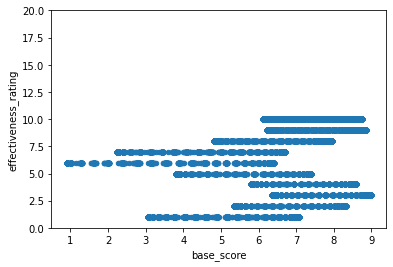

In [0]:
var = 'base_score'
data = pd.concat([df_train['effectiveness_rating'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='effectiveness_rating', ylim=(0,20));

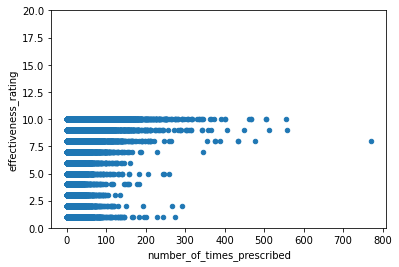

In [0]:
var='number_of_times_prescribed'
data=pd.concat([df_train['effectiveness_rating'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='effectiveness_rating',ylim=(0,20));

In [0]:
COLS = ['patient_id','text', 'sentiment','subjectivity','polarity']

In [0]:
df=pd.DataFrame(columns=COLS)

In [0]:
for index, row in islice(df_train.iterrows(), 0, None):

     new_entry = []
     text_lower=str.lower(row['review_by_patient'])
     blob = TextBlob(text_lower)
     sentiment = blob.sentiment
		 
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
		 
     new_entry += [row['patient_id'],text_lower,sentiment,subjectivity,polarity]
        
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_survey_sentimet_df, ignore_index=True)
		 
df.to_csv('df_train', mode='w', columns=COLS, index=False, encoding="utf-8")

In [0]:
df.head(3)

,patient_id,text,sentiment,subjectivity,polarity
0,206461,"""it has no side effect, i take it in combinati...","(0.0, 0.0)",0.000000,0.000000
1,95260,"""my son is halfway through his fourth week of ...","(0.16833333333333333, 0.43134920634920637)",0.431349,0.168333
2,92703,"""i used to take another oral contraceptive, wh...","(0.06720959595959597, 0.40215488215488215)",0.402155,0.067210


In [0]:
df.describe()

,subjectivity,polarity
count,32165.000000,32165.000000
mean,0.499907,0.065550
std,0.174409,0.221610
min,0.000000,-1.000000
25%,0.410417,-0.041667
50%,0.500641,0.059375
75%,0.599470,0.173437
max,1.000000,1.000000


In [0]:
dffilter=df.loc[(df.loc[:,df.dtypes!=object]!=0).any(1)]
dffilter.describe()

,subjectivity,polarity
count,31225.000000,31225.000000
mean,0.514956,0.067523
std,0.153572,0.224625
min,0.000000,-1.000000
25%,0.420000,-0.045895
50%,0.506667,0.066071
75%,0.600000,0.177381
max,1.000000,1.000000


<function matplotlib.pyplot.show>

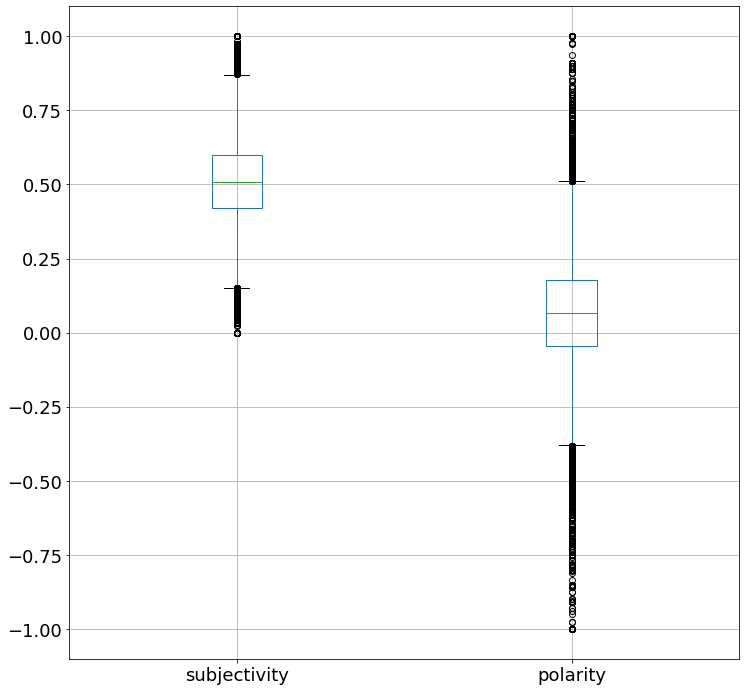

In [0]:
from matplotlib import pyplot as plt
boxplot=dffilter.boxplot(column=['subjectivity','polarity'],
                         fontsize=18,grid=True,figsize=(12,12),vert=True)
plt.show

In [0]:
dffilter.describe()

,subjectivity,polarity
count,31225.000000,31225.000000
mean,0.514956,0.067523
std,0.153572,0.224625
min,0.000000,-1.000000
25%,0.420000,-0.045895
50%,0.506667,0.066071
75%,0.600000,0.177381
max,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


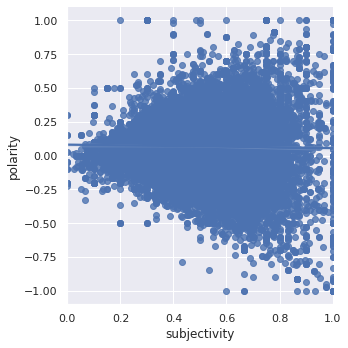

In [0]:
import matplotlib.pyplot as plt

import seaborn as sns; sns.set(color_codes=True)

g = sns.lmplot(x="subjectivity", y="polarity", data=dffilter)

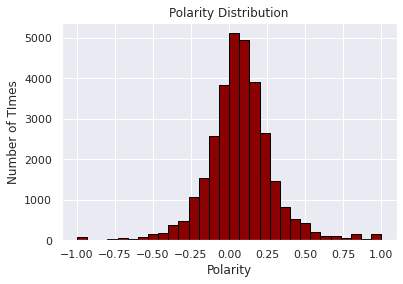

In [0]:
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

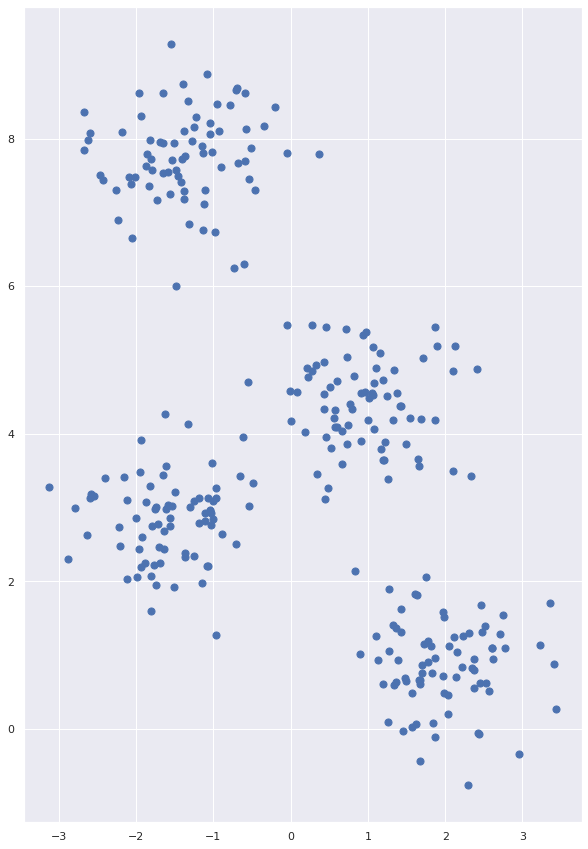

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
XT = df_train.iloc[:, [ 4]].values

In [0]:
XT

array([[9],
       [8],
       [5],
       ...,
       [9],
       [8],
       [2]])

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(XT)
    wcss.append(kmeans.inertia_)

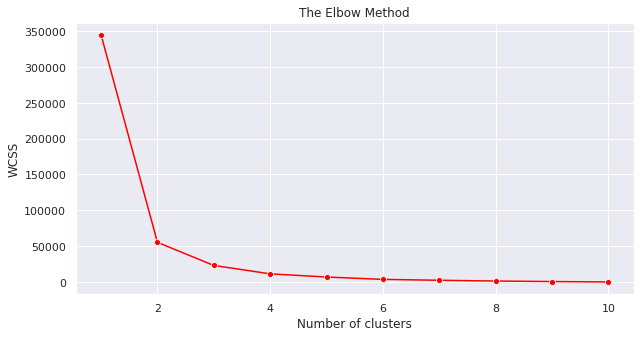

In [0]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(XT)

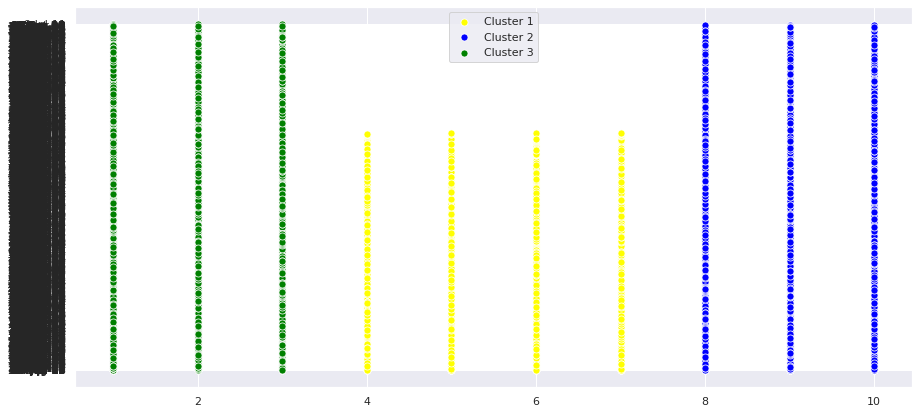

In [0]:
plt.figure(figsize=(15,7))
sns.scatterplot(XT[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(XT[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(XT[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)

plt.show()


In [0]:
import numpy as np


y_true=[505,400	,300	,250	,484	,492	,515	,400]
y_pred=[498,401,306,261,490,489,509,410]
SSE = np.square(np.subtract(y_true,y_pred)).sum()
SSE


388